# Linear Regression


> ### $\hat y = a + b*X$
    b = coefficient
    a = intercept

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import shapiro
import statsmodels.formula.api as smf
import statsmodels.api as sm

# working on a car dataset which contains
- speed(mph)
- stopping distance (ft)

In [58]:
sns.set(color_codes=True)

In [59]:
cars = pd.read_csv('./dataset/SpeedVsStopNADA.csv')
cars.head()

,Speed,StopDist
0,4,4
1,5,2
2,5,8
3,5,8
4,5,4


In [60]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
Speed       63 non-null int64
StopDist    63 non-null int64
dtypes: int64(2)
memory usage: 1.1 KB


### Discriptive Stats

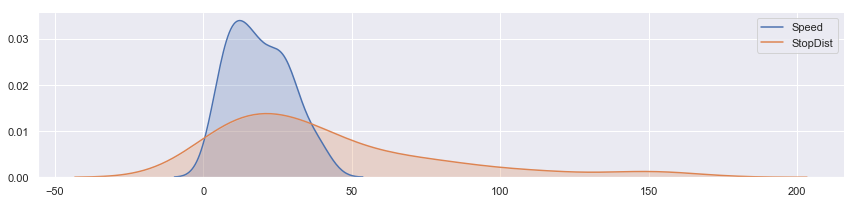

In [61]:
sns.FacetGrid(data=cars, aspect = 4)
sns.kdeplot(data=cars['Speed'],shade=True)
sns.kdeplot(data=cars['StopDist'],shade=True)


In [62]:
cars.keys()

Index(['Speed', 'StopDist'], dtype='object')

In [63]:
cars.head()

,Speed,StopDist
0,4,4
1,5,2
2,5,8
3,5,8
4,5,4


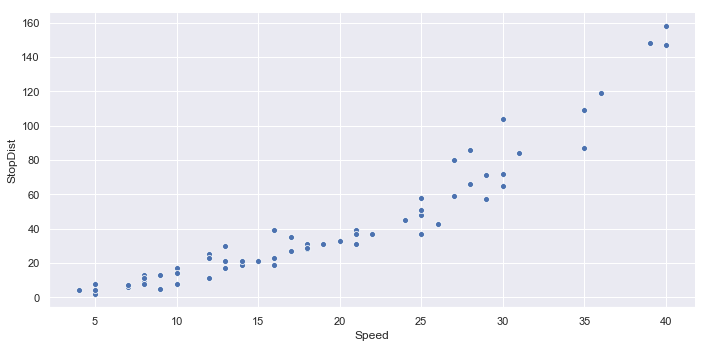

In [64]:
sns.relplot('Speed','StopDist',data=cars,kind='scatter',aspect=2)
plt.show()

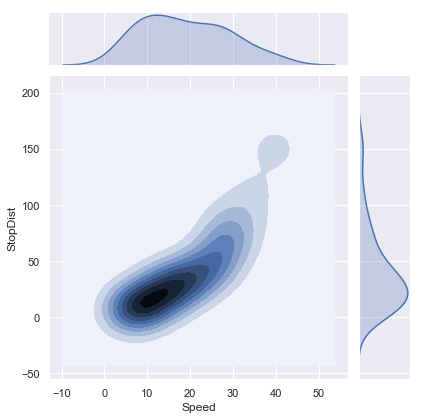

In [65]:

sns.jointplot('Speed','StopDist',data=cars,kind='kde')
plt.show()

In [66]:
cars.keys()

Index(['Speed', 'StopDist'], dtype='object')

In [67]:
model = smf.ols(formula="StopDist~Speed",data=cars)
results = model.fit()

In [68]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               StopDist   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     379.6
Date:                Sun, 10 Mar 2019   Prob (F-statistic):           7.06e-28
Time:                        23:44:11   Log-Likelihood:                -254.76
No. Observations:                  63   AIC:                             513.5
Df Residuals:                      61   BIC:                             517.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -25.2650      3.850     -6.563      0.0

In [69]:
speed = 20

distance = -22.6 + 3.4049 * speed
print('INFO: stopping distance = %0.2f ft'%(distance))

INFO: stopping distance = 45.50 ft


In [70]:
test = pd.DataFrame({'Speed':speed},index=[0])
test

,Speed
0,20


In [71]:
out = results.predict(test)
print('INFO: predict stopping distance = %0.2f ft'%(distance))

INFO: predict stopping distance = 45.50 ft


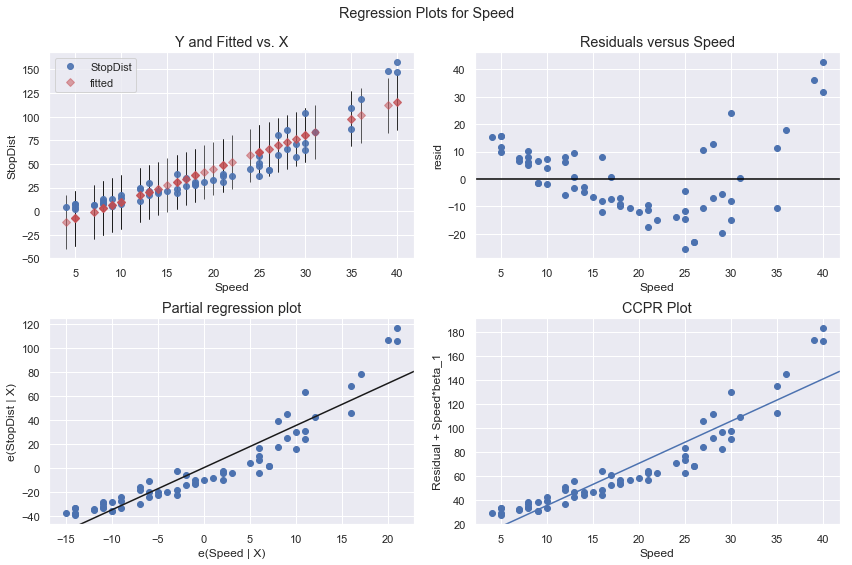

In [72]:
fig = plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(results,'Speed',fig=fig)

## Residual Analysis

INFO: Normal test p-value = (0.9585708379745483, 0.03292714059352875)


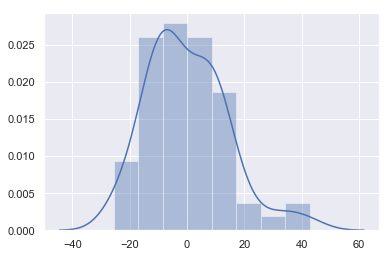

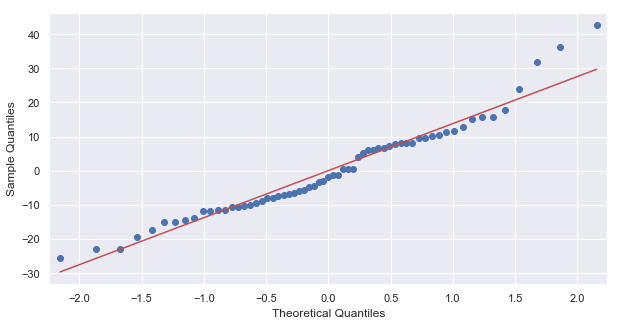

In [73]:
residual = results.resid
sns.distplot(residual)
pvalue = shapiro(residual)
print('INFO: Normal test p-value =', pvalue)
fig,ax = plt.subplots(figsize=(10,5))
fig= sm.graphics.qqplot(residual,line='s',ax =ax)

**$H_0$ :  Normal distribution** : P-value > 0.05

**$H_A$ :  Not Normal distribution** P-value < 0.05


### Basic physics equations, show that stopping distance *D* and speed *V* is 

# $ D$  $\alpha$  $V^2 $

### Non Linearity in the data

In [80]:
cars['speed_sqr'] = cars['Speed'] ** 2
cars.head()

,Speed,StopDist,speed_sqr
0,4,4,16
1,5,2,25
2,5,8,25
3,5,8,25
4,5,4,25


In [92]:
model_1 = smf.ols(formula="StopDist~speed_sqr",data=cars).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:               StopDist   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     1010.
Date:                Sun, 10 Mar 2019   Prob (F-statistic):           1.14e-39
Time:                        23:52:48   Log-Likelihood:                -226.76
No. Observations:                  63   AIC:                             457.5
Df Residuals:                      61   BIC:                             461.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1159      1.676      1.263      0.2

In [93]:
speed = 25 
distance_new = 0.0861 * speed ** 2

print('INFO: predict stopping distance @ speed %0.2f mph = %0.2f ft'%(speed,distance_new))

INFO: predict stopping distance @ speed 25.00 mph = 53.81 ft


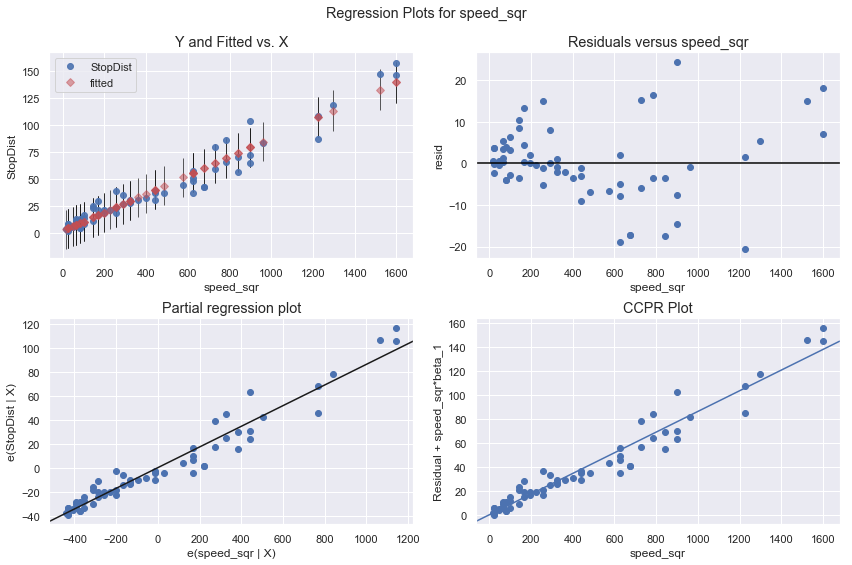

In [94]:
fig = plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(model_1,'speed_sqr',fig=fig)

### Residual Analysis

In [99]:
speed = cars['Speed']
distance_new = 0.0861 * speed ** 2
residual = cars['StopDist'] - distance_new

INFO: Normal test p-value = (0.9624764323234558, 0.052040182054042816)


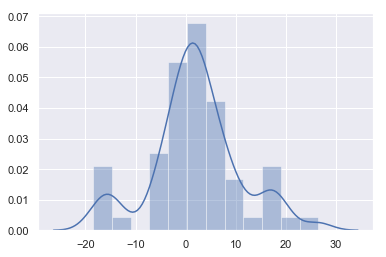

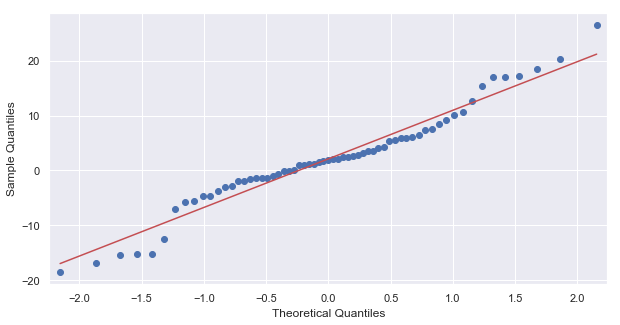

In [100]:
sns.distplot(residual)
pvalue = shapiro(residual)
print('INFO: Normal test p-value =', pvalue)
fig,ax = plt.subplots(figsize=(10,5))
fig= sm.graphics.qqplot(residual,line='s',ax =ax)